In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pandas import json_normalize
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/uploaded_data.json', 'r', encoding='utf-8', errors='ignore') as f:
    json_data = json.load(f)

# Data preproccesing

In [ ]:
# @title Extract nested keys directly
df = pd.json_normalize(json_data, 'bet', ['time', 'userid'])
#
df['match_id'] = df['pick'].apply(lambda x: x[0]['match']['id'])
df['match_dateofmatch'] = df['pick'].apply(lambda x: x[0]['match']['dateofmatch'])
df['match_home'] = df['pick'].apply(lambda x: x[0]['match']['home'])
df['match_homeId'] = df['pick'].apply(lambda x: x[0]['match']['homeId'])
df['match_away'] = df['pick'].apply(lambda x: x[0]['match']['away'])
df['match_awayId'] = df['pick'].apply(lambda x: x[0]['match']['awayId'])
df['match_sport'] = df['pick'].apply(lambda x: x[0]['match']['sport'])
df['match_category'] = df['pick'].apply(lambda x: x[0]['match']['category'])
df['match_tournament'] = df['pick'].apply(lambda x: x[0]['match']['tournament'])
df['match_sportId'] = df['pick'].apply(lambda x: x[0]['match']['sportId'])
df['match_categoryId'] = df['pick'].apply(lambda x: x[0]['match']['categoryId'])
df['match_tournamentId'] = df['pick'].apply(lambda x: x[0]['match']['tournamentId'])
df['market_freetext'] = df['pick'].apply(lambda x: x[0]['market']['freetext'])
df['market_specialoddsvalue'] = df['pick'].apply(lambda x: x[0]['market']['specialoddsvalue'])
df['market_typeid'] = df['pick'].apply(lambda x: x[0]['market']['typeid'])
df['oddField_oddTypeId'] = df['pick'].apply(lambda x: x[0]['oddField']['oddTypeId'])
df['oddField_type'] = df['pick'].apply(lambda x: x[0]['oddField']['type'])
df['oddField_value'] = df['pick'].apply(lambda x: x[0]['oddField']['value'])

# Drop the 'pick' column
df.drop(['pick'], axis=1, inplace=True)

print(df)

       stake                     time userid  match_id     match_dateofmatch  \
0       5.00  2024-04-06 23:53:03.753   8593   7479670  2024-04-06T22:30:00Z   
1       1.00  2024-04-06 23:53:24.238  13791   7452662  2024-04-06T23:30:00Z   
2       5.00  2024-04-06 23:54:22.588  18476   7384744  2024-04-06T23:30:00Z   
3      50.00  2024-04-06 23:56:06.396  65248   7431556  2024-04-06T23:00:00Z   
4      10.00  2024-04-06 23:56:57.062  27138   7384744  2024-04-06T23:30:00Z   
...      ...                      ...    ...       ...                   ...   
28605   5.00  2024-03-01 19:46:27.658  32807   7229043  2024-03-01T19:30:00Z   
28606   1.00  2024-03-01 19:46:28.489  24225   7229043  2024-03-01T19:30:00Z   
28607  50.00  2024-03-01 19:46:58.441  30131   7270622  2024-03-01T19:45:00Z   
28608   0.66  2024-03-01 19:47:17.705  39166   7229043  2024-03-01T19:30:00Z   
28609  10.00  2024-03-01 19:47:33.530   3506   7230595  2024-03-01T20:00:00Z   

                 match_home  match_home

In [ ]:
df.head()

,stake,time,userid,match_id,match_dateofmatch,match_home,match_homeId,match_away,match_awayId,match_sport,...,match_tournament,match_sportId,match_categoryId,match_tournamentId,market_freetext,market_specialoddsvalue,market_typeid,oddField_oddTypeId,oddField_type,oddField_value
0,5.0,2024-04-06 23:53:03.753,8593,7479670,2024-04-06T22:30:00Z,Carlos Mannucci,330527,Alianza Lima,2311,Soccer,...,Liga 1,1,20,406,"Asian Total Corners ({""total"": ""11.0""})","{""total"": ""11.0""}",100056,12,over {total},1.875
1,1.0,2024-04-06 23:53:24.238,13791,7452662,2024-04-06T23:30:00Z,Torque,174972,Colon FC,604000,Soccer,...,Segunda Division,1,57,1908,"1st half - total ({""total"": ""0.5""})","{""total"": ""0.5""}",68,12,over {total},2.000
2,5.0,2024-04-06 23:54:22.588,18476,7384744,2024-04-06T23:30:00Z,New York Islanders,3703,Nashville Predators,3705,Ice Hockey,...,NHL,4,37,234,"{!periodnr} period - total ({""total"": ""1.5"", ""...","{""total"": ""1.5"", ""periodnr"": ""1""}",446,12,over {total},2.700
3,50.0,2024-04-06 23:56:06.396,65248,7431556,2024-04-06T23:00:00Z,Club Leon,36534,Queretaro FC,1951,Soccer,...,"Liga MX, Clausura",1,12,27466,"Total ({""total"": ""2.5""})","{""total"": ""2.5""}",18,12,over {total},1.833
4,10.0,2024-04-06 23:56:57.062,27138,7384744,2024-04-06T23:30:00Z,New York Islanders,3703,Nashville Predators,3705,Ice Hockey,...,NHL,4,37,234,"{!periodnr} period - total ({""total"": ""0.5"", ""...","{""total"": ""0.5"", ""periodnr"": ""1""}",446,12,over {total},1.470


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28610 entries, 0 to 28609
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   stake                    28610 non-null  float64
 1   time                     28610 non-null  object 
 2   userid                   28610 non-null  object 
 3   match_id                 28610 non-null  int64  
 4   match_dateofmatch        28610 non-null  object 
 5   match_home               28610 non-null  object 
 6   match_homeId             28610 non-null  int64  
 7   match_away               28610 non-null  object 
 8   match_awayId             28610 non-null  int64  
 9   match_sport              28610 non-null  object 
 10  match_category           28601 non-null  object 
 11  match_tournament         28601 non-null  object 
 12  match_sportId            28610 non-null  int64  
 13  match_categoryId         28610 non-null  int64  
 14  match_tournamentId    

In [ ]:
df['time'] = pd.to_datetime(df['time'])
df['match_dateofmatch'] = pd.to_datetime(df['match_dateofmatch'])

Missing values in *market_specialoddsvalue*

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28610 entries, 0 to 28609
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   stake                    28610 non-null  float64            
 1   time                     28610 non-null  datetime64[ns]     
 2   userid                   28610 non-null  object             
 3   match_id                 28610 non-null  int64              
 4   match_dateofmatch        28610 non-null  datetime64[ns, UTC]
 5   match_home               28610 non-null  object             
 6   match_homeId             28610 non-null  int64              
 7   match_away               28610 non-null  object             
 8   match_awayId             28610 non-null  int64              
 9   match_sport              28610 non-null  object             
 10  match_category           28601 non-null  object             
 11  match_tournament         286

In [ ]:
print('Unique users',df['userid'].nunique())

Unique users 1050


In [ ]:
# @title Count match_category values
df['match_category'].value_counts()

match_category
Portugal         4051
International    1802
Italy            1693
England          1552
USA              1450
                 ... 
Riot LoL            1
Epl                 1
DotaPRO             1
Malaysia            1
Djibouti            1
Name: count, Length: 169, dtype: int64

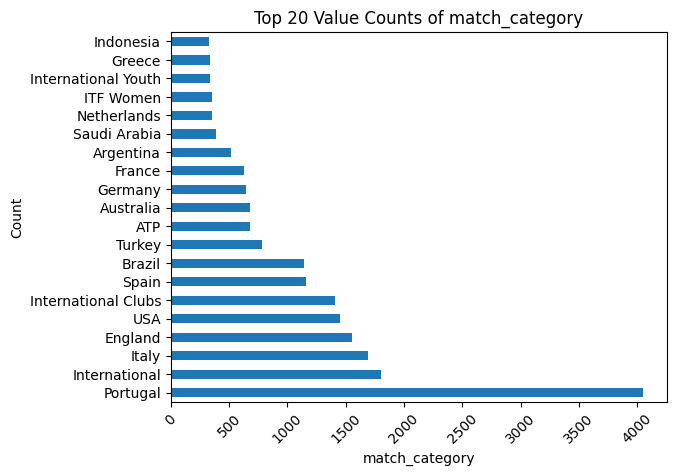

In [ ]:
# @title Top 20 Value Counts of match_category
df['match_category'].value_counts().head(20).plot(kind='barh')

# Adding title and labels
plt.title('Top 20 Value Counts of match_category')
plt.xlabel('match_category')
plt.ylabel('Count')

# Rotating x-axis labels
plt.xticks(rotation=45)

# Displaying the plot
plt.show()

In [ ]:
# @title Count match_tournament values
df['match_tournament'].value_counts()

match_tournament
Liga Portugal                                      1849
Premier League                                     1431
Serie A                                            1109
Taca de Portugal                                    932
NBA                                                 837
                                                   ... 
Malta International, Women Singles                    1
Philippines Footb. League                             1
National League, Women                                1
European Pro League                                   1
PGL Major Copenhagen, American RMR, Group Stage       1
Name: count, Length: 998, dtype: int64

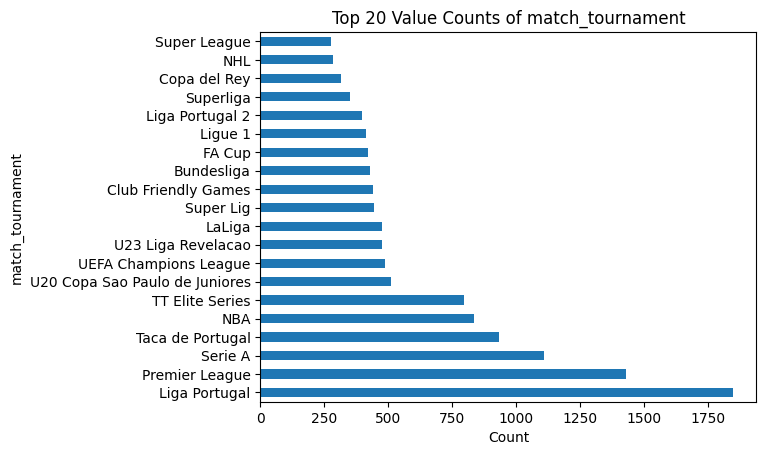

In [ ]:
# @title Top 20 Value Counts of match_tournament
df['match_tournament'].value_counts().head(20).plot(kind='barh')

# Adding title and labels
plt.title('Top 20 Value Counts of match_tournament')
plt.ylabel('match_tournament')
plt.xlabel('Count')

# Displaying the plot
plt.show()

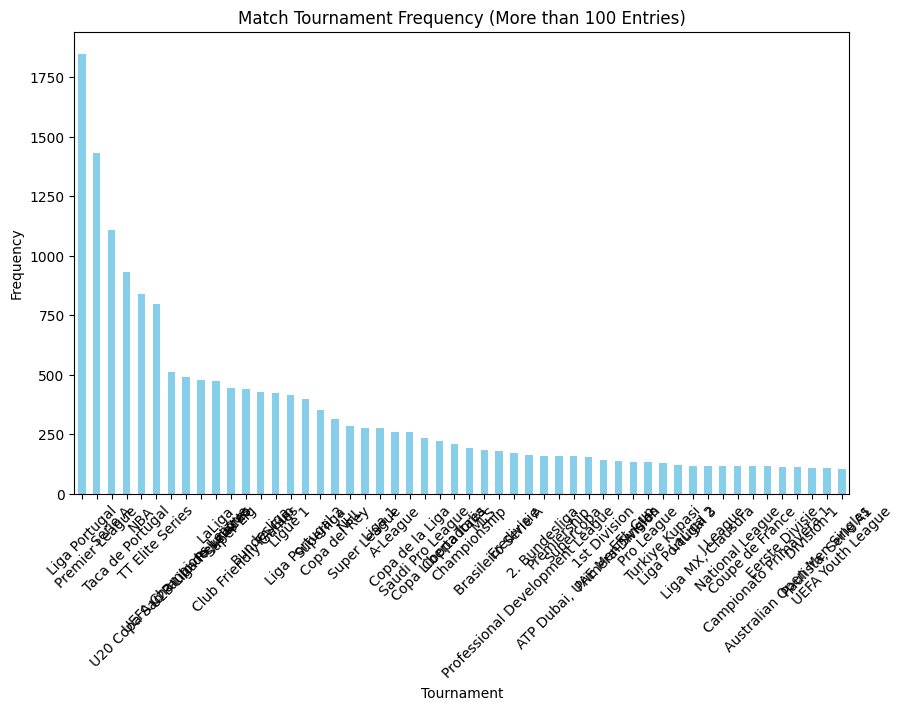

In [ ]:
# @title Calculate Value Counts and filter for those greater than 100
tournament_counts = df['match_tournament'].value_counts()
filtered_tournament_counts = tournament_counts[tournament_counts > 100]

# Plotting the filtered data
plt.figure(figsize=(10, 6))  # Adjust the size of the figure
filtered_tournament_counts.plot(kind='bar', color='skyblue')  # Create a bar plot
plt.title('Match Tournament Frequency (More than 100 Entries)')  # Add a title to the plot
plt.xlabel('Tournament')  # Add an x-label
plt.ylabel('Frequency')  # Add a y-label
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()  # Display the plot

In [ ]:
#  @title Count match_sport values
df['match_sport'].value_counts()

match_sport
Soccer               22878
Basketball            1889
Tennis                1555
Table Tennis           959
Ice Hockey             506
Volleyball             468
Handball               131
Futsal                  70
Counter-Strike          45
Badminton               23
Baseball                23
MMA                     15
Rugby                   11
American Football        8
Snooker                  6
Darts                    6
Dota 2                   4
Beach Volley             4
Cricket                  4
Call of Duty             2
League of Legends        2
Field hockey             1
Name: count, dtype: int64

In [ ]:
df['match_home'].value_counts()

match_home
Benfica Lisbon               354
Sporting CP                  328
Rio Ave FC                   280
FC Porto                     270
Real Madrid                  245
                            ... 
Racing FC Porto Palmeiras      1
Municipal Limeno               1
Mali                           1
Quilmes Mar Del Plata          1
Virtus Vecomp Verona           1
Name: count, Length: 4452, dtype: int64

In [ ]:
df['stake'].agg(['mean', 'median', 'min', 'max', 'sum'])

mean      3.826418e+01
median    1.000000e+01
min       1.000000e-01
max       1.000000e+04
sum       1.094738e+06
Name: stake, dtype: float64

In [ ]:
df.groupby('userid')['stake'].agg(['mean', 'median', 'min', 'max', 'count', 'sum'])
#find which users were mostly betting ona specific team or betting type or sport type

,mean,median,min,max,count,sum
userid,,,,,,
36,7.500000,7.5,5.0,10.0,2,15.00
40,50.285714,50.0,50.0,52.0,7,352.00
211,15.912975,15.0,1.0,79.0,121,1925.47
281,8.400000,10.0,2.0,10.0,5,42.00
294,4.117647,2.5,2.0,25.0,17,70.00
...,...,...,...,...,...,...
68056,6.507647,5.0,2.0,20.0,17,110.63
68058,16.593548,19.0,4.2,32.0,31,514.40
68060,137.500000,137.5,25.0,250.0,2,275.00


## Filter those players who have the maximum number of bets, at least 3

In [ ]:
user_bet_counts = df.groupby('userid')['stake'].count()

# Filtering users with more than one bet
users_with_multiple_bets = user_bet_counts[user_bet_counts > 3]

# Counting the number of users with more than one bet
num_users_with_multiple_bets = len(users_with_multiple_bets)


In [ ]:
users_with_multiple_bets_ids = users_with_multiple_bets.index.tolist()

df = df[df['userid'].isin(users_with_multiple_bets_ids)]
df.head().to_dict()

{'stake': {0: 5.0, 1: 1.0, 2: 5.0, 3: 50.0, 4: 10.0},
 'time': {0: Timestamp('2024-04-06 23:53:03.753000'),
  1: Timestamp('2024-04-06 23:53:24.238000'),
  2: Timestamp('2024-04-06 23:54:22.588000'),
  3: Timestamp('2024-04-06 23:56:06.396000'),
  4: Timestamp('2024-04-06 23:56:57.062000')},
 'userid': {0: 8593, 1: 13791, 2: 18476, 3: 65248, 4: 27138},
 'match_id': {0: 7479670, 1: 7452662, 2: 7384744, 3: 7431556, 4: 7384744},
 'match_dateofmatch': {0: Timestamp('2024-04-06 22:30:00+0000', tz='UTC'),
  1: Timestamp('2024-04-06 23:30:00+0000', tz='UTC'),
  2: Timestamp('2024-04-06 23:30:00+0000', tz='UTC'),
  3: Timestamp('2024-04-06 23:00:00+0000', tz='UTC'),
  4: Timestamp('2024-04-06 23:30:00+0000', tz='UTC')},
 'match_home': {0: 'Carlos Mannucci',
  1: 'Torque',
  2: 'New York Islanders',
  3: 'Club Leon',
  4: 'New York Islanders'},
 'match_homeId': {0: 330527, 1: 174972, 2: 3703, 3: 36534, 4: 3703},
 'match_away': {0: 'Alianza Lima',
  1: 'Colon FC',
  2: 'Nashville Predators',
  3

In [ ]:
df['userid'].nunique()

678

In [ ]:
df.groupby('match_sport')['stake'].agg(['sum', 'count', 'median'])
# find out bet size, number of bets and the median of bet

,sum,count,median
match_sport,,,
American Football,1203.950,8,36.225
Badminton,507.960,23,20.000
Baseball,1419.500,23,25.000
Basketball,98075.390,1847,14.000
Beach Volley,52.050,4,12.835
Call of Duty,1005.400,2,502.700
Counter-Strike,2149.010,42,14.250
Cricket,2075.000,4,535.000
Darts,1500.000,3,400.000


In [ ]:
df.groupby('match_home')['stake'].agg(['sum', 'count', 'median'])

,sum,count,median
match_home,,,
"fruhvirtova, Brenda",18.0,1,18.0
1 FC Cologne,67.0,4,17.0
1 FC Kleve,12.0,1,12.0
1 FC Nuremberg,332.5,5,25.0
1 FC Slovacko,142.0,3,40.0
...,...,...,...
"van Assche, Luca",125.0,4,27.5
"van Dijk, Bram",1000.0,1,1000.0
"van Zyl, Marilouise",9.0,1,9.0


In [ ]:
df.groupby('match_away')['stake'].agg(['sum', 'count', 'median'])

,sum,count,median
match_away,,,
07 Vestur Sorvagur,6.00,2,3.00
1 Dezembro,343.11,20,5.50
1 FC Cologne,15.75,4,4.50
1 FC Germ Egestorf/Langreder,75.00,2,37.50
1 FC Nuremberg,25.20,6,2.10
...,...,...,...
"de Loore, Joris",36.00,2,18.00
medi bayreuth,30.00,1,30.00
"van Assche, Luca",1005.00,2,502.50


In [ ]:
df.groupby('match_tournament')['stake'].agg(['sum', 'count', 'median'])

,sum,count,median
match_tournament,,,
1 Division,339.0,8,20.0
1 Lyga,67.1,3,12.0
1. A SKL,20.0,2,10.0
1. Bundesliga,225.0,7,16.0
1. CFL,105.0,6,7.5
...,...,...,...
Ykkosliigacup,10.0,1,10.0
Youth League,594.0,8,91.5
"Youth League, Women",325.0,6,52.5


<Axes: xlabel='stake', ylabel='match_sport'>

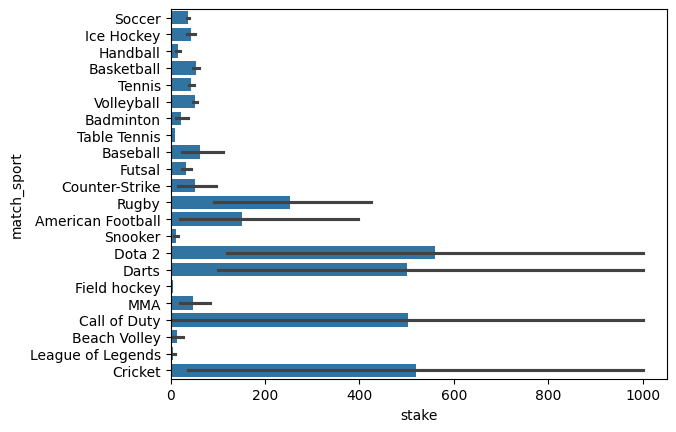

In [ ]:
sns.barplot(df, y = 'match_sport', x = 'stake')

In [ ]:
df['market_specialoddsvalue'].value_counts()
# people mostly bets on more than 0.5 goals

market_specialoddsvalue
{"total": "0.5"}                                   2919
{"total": "1.5"}                                   2801
{"total": "2.5"}                                   2180
{"total": "3.5"}                                   1182
{"total": "4.5"}                                    783
                                                   ... 
{"variant": "pre:playerprops:42023229:280441"}        1
{"total": "21.5", "player": "sr:player:996299"}       1
{"setnr": "3", "total": "48.5"}                       1
{"total": "56.5", "quarternr": "2"}                   1
{"total": "15.5", "gamenr": "4"}                      1
Name: count, Length: 1071, dtype: int64

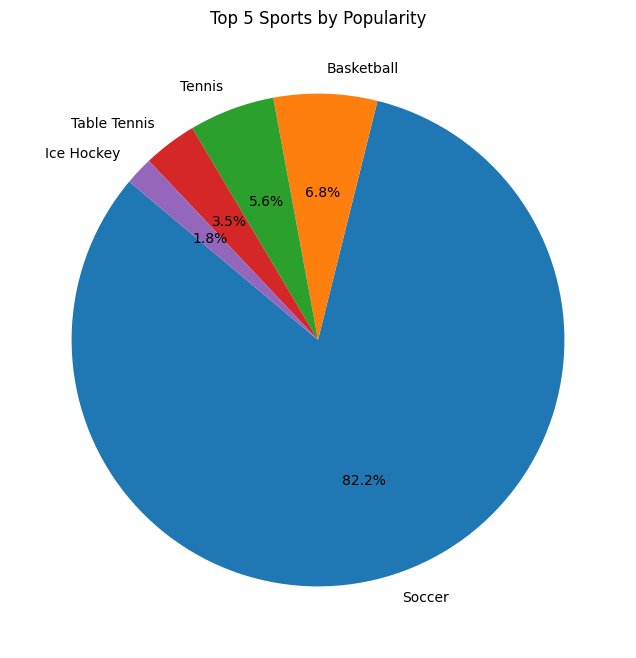

In [ ]:
# Count the occurrences of each sport and filter the top 5
top_sports = df['match_sport'].value_counts().nlargest(5)

# Setting up the plot data
labels = top_sports.index
sizes = top_sports.values

# Creating the pie chart for the top 5 sports
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Sports by Popularity')
plt.show()

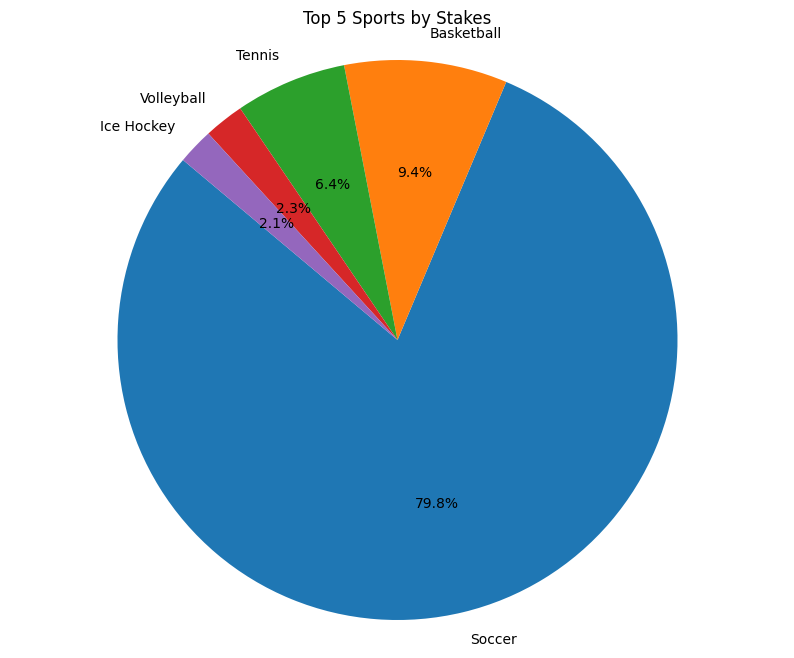

In [ ]:
# Group data by 'match_sport' and sum 'stake'
grouped_stakes = df.groupby('match_sport')['stake'].sum()

# Get the top 5 sports by total stakes
top_stakes = grouped_stakes.nlargest(5)

# Setup for plotting
labels = top_stakes.index
sizes = top_stakes.values

# Plotting the pie chart for the top 5 sports by stakes
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Sports by Stakes')
plt.axis('equal')  # Maintains the circle shape
plt.show()

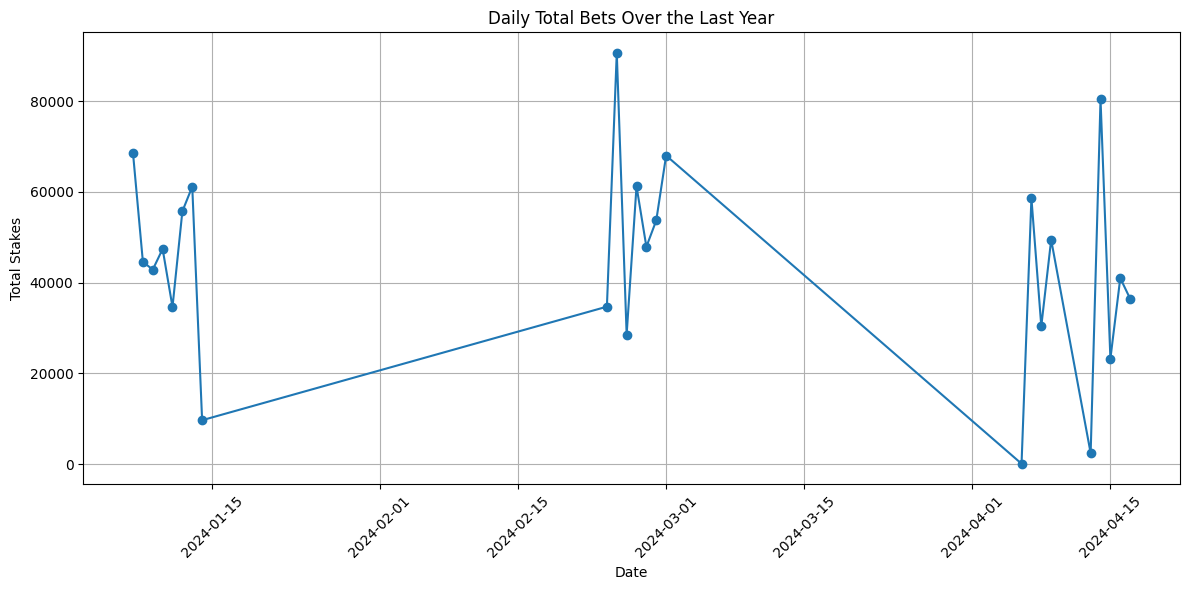

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'time' column to datetime format accounting for milliseconds
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d')

# Determine the latest date and compute one year ago from that
latest_date = df['time'].max()
one_year_ago = latest_date - pd.DateOffset(years=1)

# Filter the dataframe to only include data from the last year
filtered_df = df[df['time'] >= one_year_ago]

# Aggregate stakes by day
daily_bets = filtered_df.groupby(filtered_df['time'].dt.floor('d'))['stake'].sum()

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(daily_bets.index, daily_bets.values, marker='o', linestyle='-')
plt.title('Daily Total Bets Over the Last Year')
plt.xlabel('Date')
plt.ylabel('Total Stakes')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate date labels for better visibility
plt.tight_layout()  # Adjust layout to ensure everything fits without overlap
plt.show()



In [ ]:
earliest_record = df['time'].min()
earliest_record

Timestamp('2024-01-07 14:18:00.609000')

In [ ]:
df['date'] = df['time'].dt.date

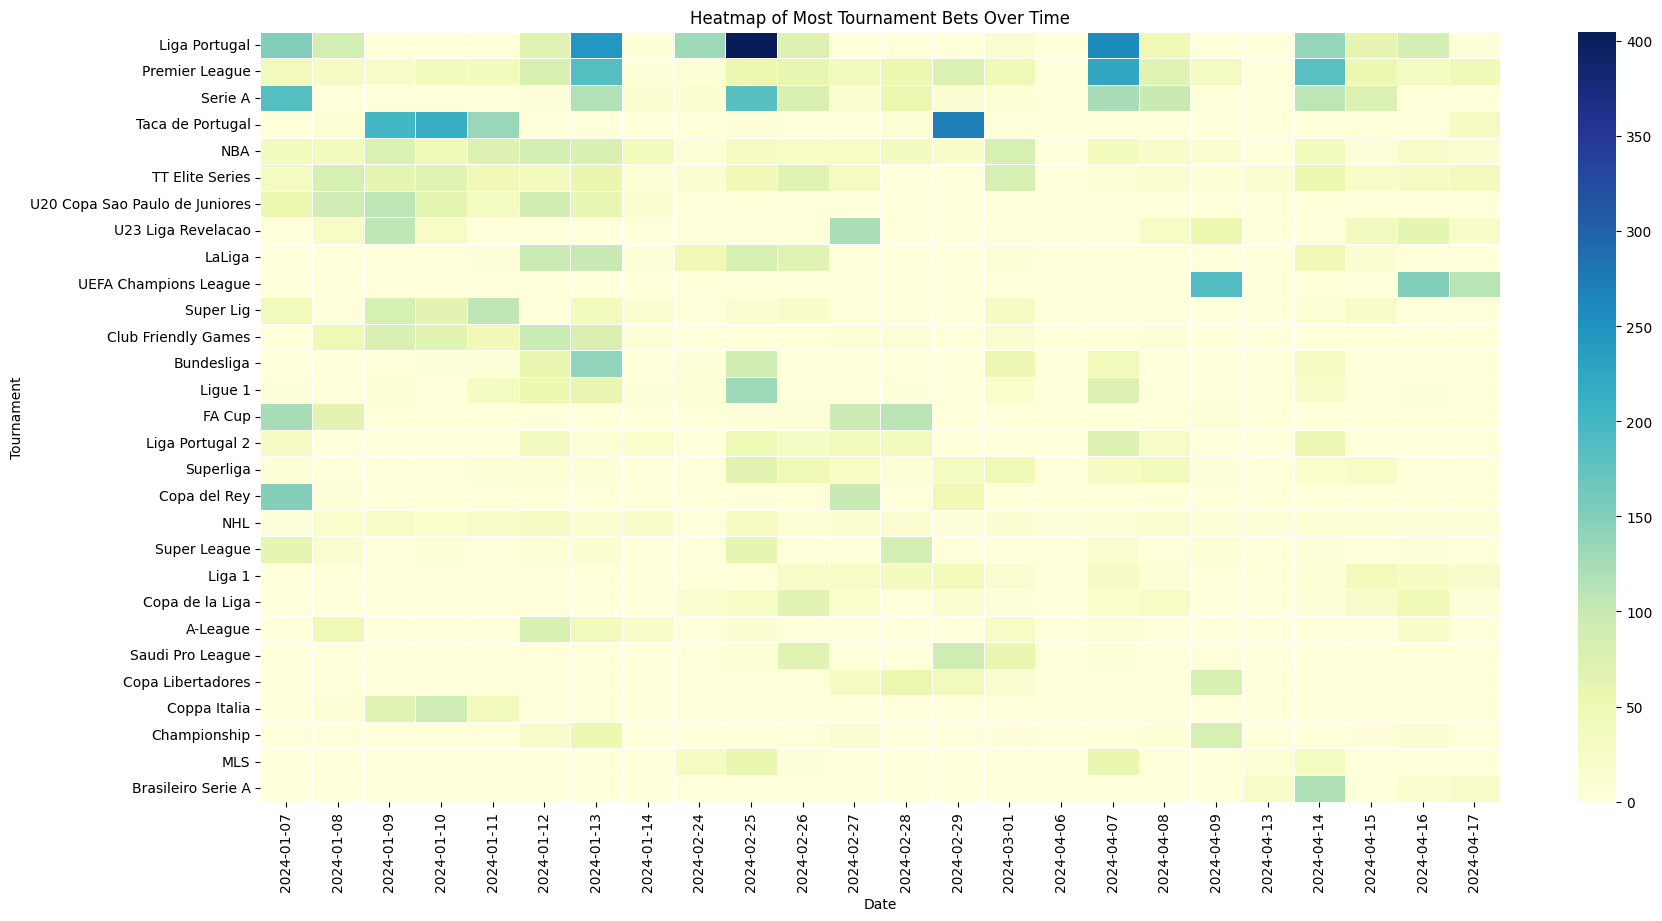

In [ ]:
contingency_table_sport = pd.crosstab(df['match_sport'], df['date'])
contingency_table_tournament = pd.crosstab(df['match_tournament'], df['date'])

# Filter for the top 20% of tournaments based on overall frequency
top_tournaments = contingency_table_tournament.sum(axis=1).nlargest(int(len(contingency_table_tournament) * 0.03))
filtered_table_tournament = contingency_table_tournament.loc[top_tournaments.index]


# Plotting the heatmap for the top 20% 'match_tournament'
plt.figure(figsize=(20, 10))  # Adjust the size as needed
sns.heatmap(filtered_table_tournament, cmap="YlGnBu", linewidths=.5)
plt.title('Heatmap of Most Tournament Bets Over Time')
plt.xlabel('Date')
plt.ylabel('Tournament')
plt.show()

                 match_tournament  NumberOfBets
0                   Liga Portugal          1764
1                  Premier League          1393
2                         Serie A          1076
3                Taca de Portugal           869
4                             NBA           815
5                 TT Elite Series           795
6  U20 Copa Sao Paulo de Juniores           507
7              U23 Liga Revelacao           469
8                          LaLiga           465
9           UEFA Champions League           456


<ipython-input-123-36a35ed10661>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='NumberOfBets', y='match_tournament', data=tournament_counts.head(10), palette='magma')  # Using the top 10 for clarity


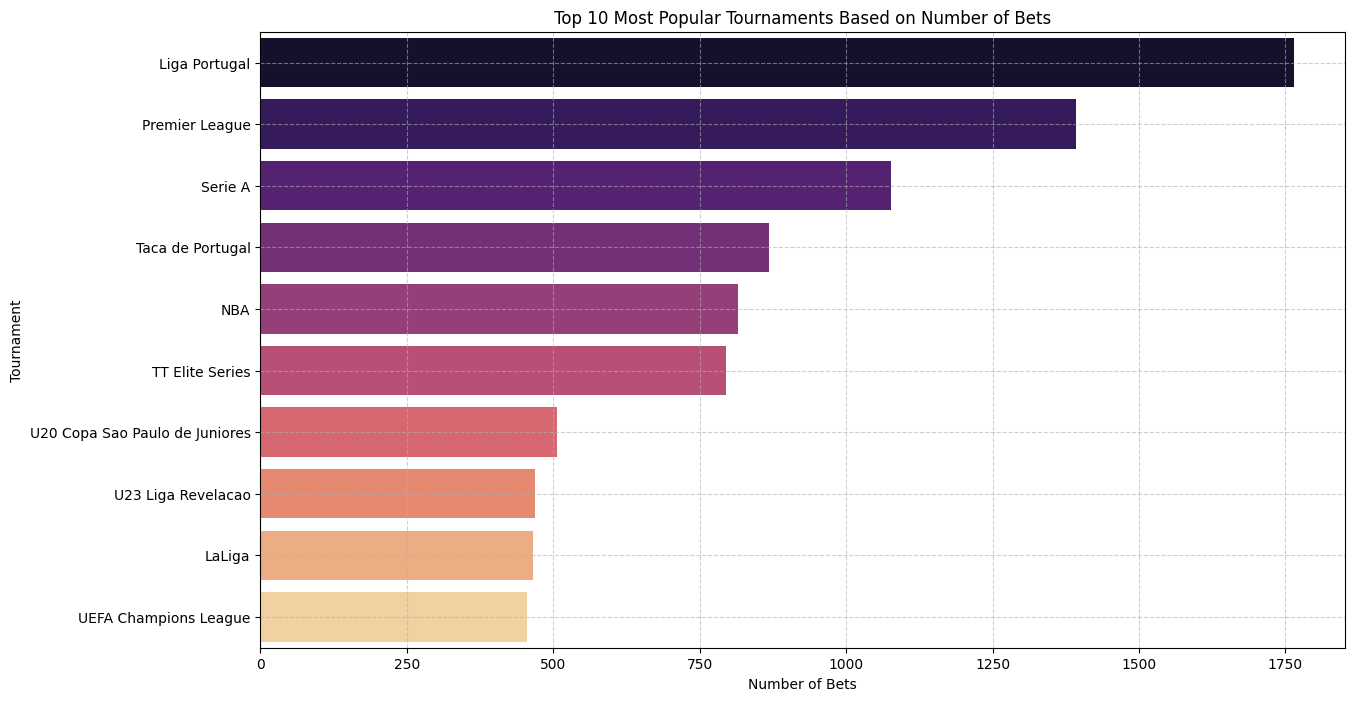

In [ ]:
# Count the number of bets per tournament
tournament_counts = df['match_tournament'].value_counts().reset_index()
tournament_counts.columns = ['match_tournament', 'NumberOfBets']

# Display the top tournaments
print(tournament_counts.head(10))

# Sorting data for better visualization
tournament_counts = tournament_counts.sort_values(by='NumberOfBets', ascending=False)

# Create a bar chart for the top 10 most popular tournaments
plt.figure(figsize=(14, 8))
sns.barplot(x='NumberOfBets', y='match_tournament', data=tournament_counts.head(10), palette='magma')  # Using the top 10 for clarity
plt.title('Top 10 Most Popular Tournaments Based on Number of Bets')
plt.xlabel('Number of Bets')
plt.ylabel('Tournament')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
df['match_tournament']

0                   Liga 1
1         Segunda Division
2                      NHL
3        Liga MX, Clausura
4                      NHL
               ...        
28605           Bundesliga
28606           Bundesliga
28607     Serie C, Group A
28608           Bundesliga
28609              Ligue 1
Name: match_tournament, Length: 27993, dtype: object

In [ ]:
df.head()

,stake,time,userid,match_id,match_dateofmatch,match_home,match_homeId,match_away,match_awayId,match_sport,match_category,match_tournament,match_sportId,match_categoryId,match_tournamentId,market_freetext,market_specialoddsvalue,market_typeid,oddField_oddTypeId,oddField_type,oddField_value,date
0,5.0,2024-04-06 23:53:03.753,8593,7479670,2024-04-06 22:30:00+00:00,Carlos Mannucci,330527,Alianza Lima,2311,Soccer,Peru,Liga 1,1,20,406,"Asian Total Corners ({""total"": ""11.0""})","{""total"": ""11.0""}",100056,12,over {total},1.875,2024-04-06
1,1.0,2024-04-06 23:53:24.238,13791,7452662,2024-04-06 23:30:00+00:00,Torque,174972,Colon FC,604000,Soccer,Uruguay,Segunda Division,1,57,1908,"1st half - total ({""total"": ""0.5""})","{""total"": ""0.5""}",68,12,over {total},2.000,2024-04-06
2,5.0,2024-04-06 23:54:22.588,18476,7384744,2024-04-06 23:30:00+00:00,New York Islanders,3703,Nashville Predators,3705,Ice Hockey,USA,NHL,4,37,234,"{!periodnr} period - total ({""total"": ""1.5"", ""...","{""total"": ""1.5"", ""periodnr"": ""1""}",446,12,over {total},2.700,2024-04-06
3,50.0,2024-04-06 23:56:06.396,65248,7431556,2024-04-06 23:00:00+00:00,Club Leon,36534,Queretaro FC,1951,Soccer,Mexico,"Liga MX, Clausura",1,12,27466,"Total ({""total"": ""2.5""})","{""total"": ""2.5""}",18,12,over {total},1.833,2024-04-06
4,10.0,2024-04-06 23:56:57.062,27138,7384744,2024-04-06 23:30:00+00:00,New York Islanders,3703,Nashville Predators,3705,Ice Hockey,USA,NHL,4,37,234,"{!periodnr} period - total ({""total"": ""0.5"", ""...","{""total"": ""0.5"", ""periodnr"": ""1""}",446,12,over {total},1.470,2024-04-06


In [ ]:
df['time']

0       2024-04-06 23:53:03.753
1       2024-04-06 23:53:24.238
2       2024-04-06 23:54:22.588
3       2024-04-06 23:56:06.396
4       2024-04-06 23:56:57.062
                  ...          
28605   2024-03-01 19:46:27.658
28606   2024-03-01 19:46:28.489
28607   2024-03-01 19:46:58.441
28608   2024-03-01 19:47:17.705
28609   2024-03-01 19:47:33.530
Name: time, Length: 27993, dtype: datetime64[ns]

# Kmeans Clustering

In [ ]:
# Aggregate user betting behavior
user_profiles = df.groupby('userid').agg({
    'stake': ['mean'],
    'market_freetext': lambda x: x.mode().iloc[0] if not x.mode().empty else 'unknown',
    'market_specialoddsvalue': lambda x: x.mode().iloc[0] if not x.mode().empty else 'unknown',
    'match_tournament': lambda x: x.mode().iloc[0] if not x.mode().empty else 'unknown',
}).reset_index()

# Flatten multi-level column names
user_profiles.columns = ['userid', 'avg_stake', 'favorite_market', 'market_special','match_tournament']

user_profiles = user_profiles[(user_profiles['avg_stake'] > 10) & (user_profiles['avg_stake'] < 300)]


# Prepare data for clustering
numerical_features = ['avg_stake']
categorical_features = ['favorite_market', 'market_special','match_tournament']


# Define column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse=False), categorical_features)
    ]
)

# # Create a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Transform the data
user_profiles_transformed = pipeline.fit_transform(user_profiles)




/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Aggregate user betting behavior
user_profiles = df.groupby('userid').agg({
    'stake': ['mean', 'sum', 'count'],
    'match_sport': lambda x: x.mode().iloc[0] if not x.mode().empty else 'unknown',
    'match_tournament': lambda x: x.mode().iloc[0] if not x.mode().empty else 'unknown',
    'oddField_type': lambda x: x.mode().iloc[0] if not x.mode().empty else 'unknown',
    'match_category': lambda x: x.mode().iloc[0] if not x.mode().empty else 'unknown'
}).reset_index()

# Flatten multi-level column names
user_profiles.columns = ['userid', 'avg_stake', 'total_stake', 'bet_count', 'favorite_sport', 'favorite_tournament', 'favorite_oddField_type', 'favorite_match_category']
user_profiles = user_profiles[(user_profiles['avg_stake'] > 10) & (user_profiles['avg_stake'] < 300)]
# Prepare data for clustering
numerical_features = ['avg_stake', 'total_stake', 'bet_count']
categorical_features = ['favorite_sport', 'favorite_tournament', 'favorite_oddField_type', 'favorite_match_category']
# Define column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse=False), categorical_features)
    ]
)

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Transform the data
user_profiles_transformed = pipeline.fit_transform(user_profiles)




/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

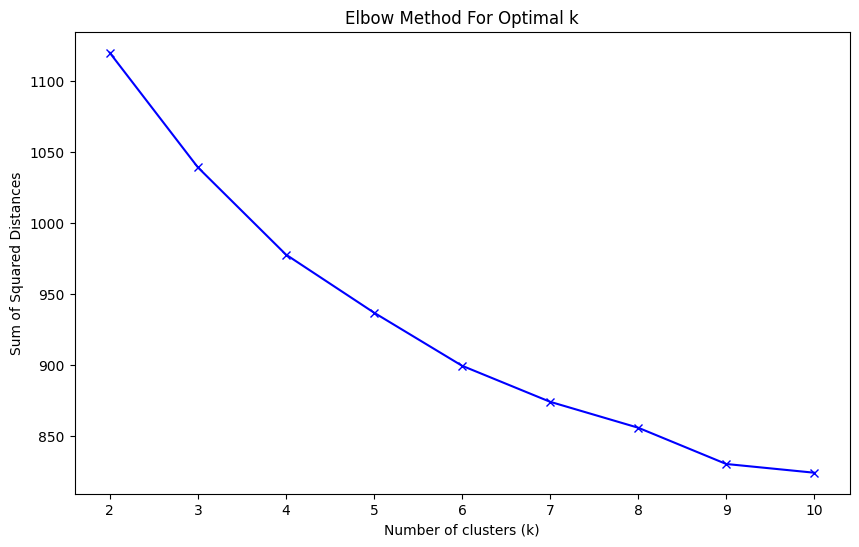

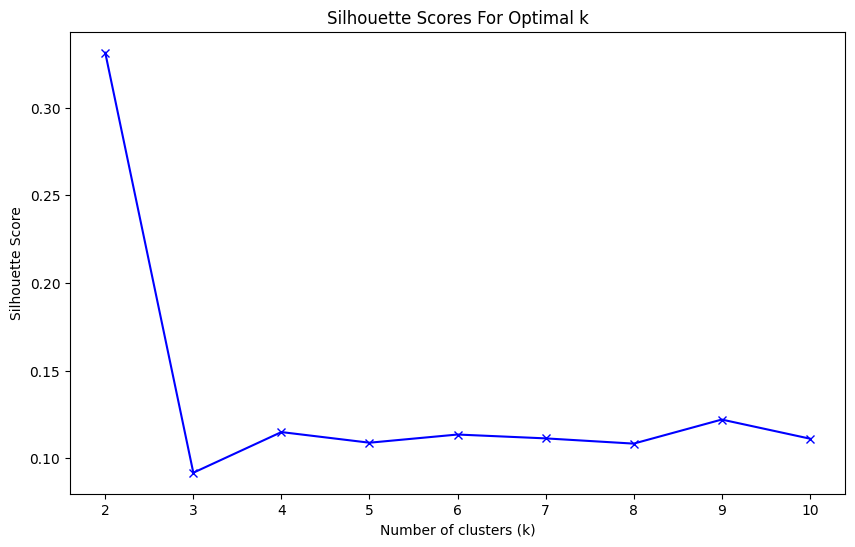

In [ ]:
# @title metrics

# Determine optimal number of clusters using the elbow method
sse = []
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(user_profiles_transformed)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(user_profiles_transformed, kmeans.labels_))

# Plot SSE for the elbow method
plt.figure(figsize=(10, 6))
plt.plot(k_values, sse, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores For Optimal k')
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
user_profiles['cluster'] = kmeans.fit_predict(user_profiles_transformed)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


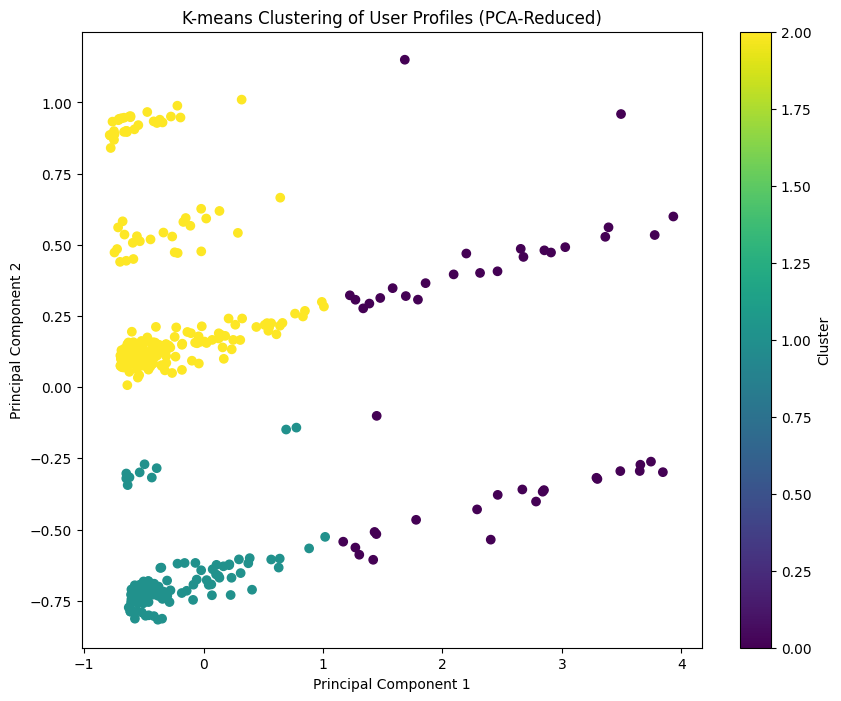

In [ ]:
# Reduce dimensions with PCA
pca = PCA(n_components=2)
user_profiles_pca = pca.fit_transform(user_profiles_transformed)

# Plot the clusters in PCA-reduced space
plt.figure(figsize=(10, 8))
scatter = plt.scatter(user_profiles_pca[:, 0], user_profiles_pca[:, 1], c=user_profiles['cluster'], cmap='viridis')
plt.colorbar(scatter, label='Cluster')
plt.title('K-means Clustering of User Profiles (PCA-Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [ ]:
# Cluster Count Plot
cluster_counts = user_profiles['cluster'].value_counts().sort_index()
cluster_counts

cluster
0     46
1    106
2    230
Name: count, dtype: int64

In [ ]:
# Filter for cluster 3
cluster_3 = user_profiles[user_profiles['cluster'] == 2]

# Display the first few rows of the cluster 3 data
print(cluster_3.head())

# Summary statistics for cluster 3
# print(cluster_3.describe())

   userid  avg_stake                              favorite_market  \
0      40  50.285714  1st half - total corners ({"total": "2.5"})   
1     211  15.912975          1st half - total ({"total": "0.5"})   
4     313  18.550408          1st half - total ({"total": "0.5"})   
5     320  49.269231  1st half - total corners ({"total": "4.5"})   
6     395  19.606742          1st half - total ({"total": "1.0"})   

     market_special                match_tournament  cluster  
0  {"total": "2.5"}                         Serie A        2  
1  {"total": "0.5"}  U20 Copa Sao Paulo de Juniores        2  
4  {"total": "0.5"}                   Liga Portugal        2  
5  {"total": "4.5"}                   Liga Portugal        2  
6  {"total": "1.0"}               Liga MX, Clausura        2  


In [ ]:
user_profiles['avg_stake'].max()

295.0

In [ ]:
user_profiles['avg_stake'].min()

10.066666666666666

In [ ]:
user_profiles['avg_stake'].mean()

51.989095978551134

In [ ]:
# Convert the DataFrame to a JSON file and save it
user_profiles_json = user_profiles.to_json(orient='records')
# Print the recommendations for the specific user

# Save the JSON to a file
json_path = 'user_profiles.json'
with open(json_path, 'w') as json_file:
    json_file.write(user_profiles_json)

In [ ]:
# @title Evaluation metrics
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Compute Silhouette Score
silhouette_avg = silhouette_score(user_profiles_transformed, user_profiles['cluster'])
print(f"Silhouette Score: {silhouette_avg}")

# Compute Davies-Bouldin Index
db_index = davies_bouldin_score(user_profiles_transformed, user_profiles['cluster'])
print(f"Davies-Bouldin Index: {db_index}")

# Compute Calinski-Harabasz Index
ch_index = calinski_harabasz_score(user_profiles_transformed, user_profiles['cluster'])
print(f"Calinski-Harabasz Index: {ch_index}")


Silhouette Score: 0.09165771800663791
Davies-Bouldin Index: 2.3930829549970007
Calinski-Harabasz Index: 70.41196204573555


Based on these metrics:


*   Silhouette Score (0.43): Indicates reasonably well-defined clusters. It shows that the data points are closer to their own cluster than to others but can be further improved.
*   Davies-Bouldin Index (1.17): Indicates moderate within-cluster dispersion and moderate separation between clusters.
*   Calinski-Harabasz Index (83.82): Indicates well-defined clusters with good separation.






# Reviewing Feature Engineering

In [ ]:
# @title Display the user profiles to check the aggregated features
user_profiles


,userid,avg_stake,favorite_market,market_special,match_tournament,cluster
0,40,50.285714,"1st half - total corners ({""total"": ""2.5""})","{""total"": ""2.5""}",Serie A,2
1,211,15.912975,"1st half - total ({""total"": ""0.5""})","{""total"": ""0.5""}",U20 Copa Sao Paulo de Juniores,2
4,313,18.550408,"1st half - total ({""total"": ""0.5""})","{""total"": ""0.5""}",Liga Portugal,2
5,320,49.269231,"1st half - total corners ({""total"": ""4.5""})","{""total"": ""4.5""}",Liga Portugal,2
6,395,19.606742,"1st half - total ({""total"": ""1.0""})","{""total"": ""1.0""}","Liga MX, Clausura",2
...,...,...,...,...,...,...
671,68015,207.200000,"1st half - total ({""total"": ""1.5""})","{""total"": ""1.5""}",Professional Development League,0
672,68020,16.000000,"Total ({""total"": ""2.5""})","{""total"": ""2.5""}",China League 2,2
674,68033,136.375000,1x2,"{""hcp"": ""-1""}",Copa de la Liga,0
675,68045,12.571429,"1st half - total ({""total"": ""0.5""})","{""total"": ""3.5""}",Coupe d Algerie,2


In [ ]:
# @title Inspecting Clusters
# Check the distribution of users across clusters
print(user_profiles['cluster'].value_counts())

# Inspect the users within a specific cluster
cluster_id = 1  # Example cluster ID
user_profiles[user_profiles['cluster'] == cluster_id]


cluster
2    230
1    106
0     46
Name: count, dtype: int64


,userid,avg_stake,favorite_market,market_special,match_tournament,cluster
8,411,58.833333,1x2,"{""total"": ""7.5""}",Liga Portugal,1
16,664,10.174706,1x2,"{""total"": ""5.5""}",Serie A,1
17,832,27.568571,1x2,"{""total"": ""3.5""}",Liga Portugal,1
20,1075,70.715636,1x2,"{""setnr"": ""2"", ""total"": ""46.5""}",Superliga,1
21,1077,32.234286,1x2,"{""total"": ""1.5""}",Liga Portugal,1
...,...,...,...,...,...,...
613,66697,61.900000,1x2,unknown,"Division de Honor, Apertura",1
632,66798,27.000000,1x2,"{""total"": ""0.5""}","National League, First Division",1
641,67082,29.475714,1x2,"{""hcp"": ""0:1""}",Liga Portugal,1
651,67344,16.600000,1x2,"{""total"": ""16""}",Liga Portugal,1


# Generating Recommendations for **individuals**

______Optimized *code_______*

---



In [ ]:
def recommend_bets(user_id, user_profiles, df, target_features):
    user_cluster = user_profiles[user_profiles['userid'] == user_id]['cluster'].values[0]
    similar_users = user_profiles[user_profiles['cluster'] == user_cluster]['userid'].values

    user_bets = df[df['userid'] == user_id]['match_id'].unique()
    similar_users_bets = df[df['userid'].isin(similar_users) & ~df['match_id'].isin(user_bets)]

    recommendations = {}
    for feature in target_features:
        recommended_bets = similar_users_bets[feature].value_counts().head(3).index.tolist()
        recommendations[feature] = recommended_bets

    return recommendations


In [ ]:
target_features = ['match_sportId', 'match_categoryId', 'match_tournamentId', 'oddField_oddTypeId']

# Example user_id for individual recommendation
user_id = 10843

# Generate recommendations for a specific user
recommended_bets = recommend_bets(user_id, user_profiles, df, target_features)

# Convert the dictionary to a DataFrame for easy manipulation
recommended_bets_df = pd.DataFrame([{feature: bets for feature, bets in recommended_bets.items()}])

# Export the recommendations for the specific user to a CSV file
recommended_bets_df.to_csv('single_recommendations.csv', index=False)

# Convert the DataFrame to a JSON file and save it
recommended_bets_df_json = recommended_bets_df.to_json(orient='records')
# Print the recommendations for the specific user

# Save the JSON to a file
json_path = 'single_recommendations.json'
with open(json_path, 'w') as json_file:
    json_file.write(recommended_bets_df_json)

________Optimized code_______


In [ ]:
def recommend_bets(user_id, user_profiles, df, target_feature):
    user_cluster = user_profiles[user_profiles['userid'] == user_id]['cluster'].values[0]
    similar_users = user_profiles[user_profiles['cluster'] == user_cluster]['userid'].values

    user_bets = df[df['userid'] == user_id]['match_id'].unique()
    similar_users_bets = df[df['userid'].isin(similar_users) & ~df['match_id'].isin(user_bets)]

    recommended_bets = similar_users_bets[target_feature].value_counts().head(3).index.tolist()
    return recommended_bets

def evaluate_recommendations(user_id, recommended_bets, df, target_feature):
    actual_bets = df[df['userid'] == user_id][target_feature].unique()
    hit_rate = len(set(recommended_bets) & set(actual_bets)) / len(recommended_bets)
    results= [actual_bets, hit_rate]
    return results

In [ ]:
# @title ##Recommendations based on match_sport

target_feature = 'match_sport'

# Recommend bets for a specific user
user_id = 10843
recommended_bets = recommend_bets(user_id, user_profiles, df, target_feature)
print("Recommended match sport: ", recommended_bets)

# Evaluate the recommendations
actual_bets, hit_rate = evaluate_recommendations(user_id, recommended_bets, df, target_feature)
print('Hit Rate: ', hit_rate)
print('Actual Bets: ', actual_bets)

Recommended match sport:  ['Soccer', 'Tennis', 'Basketball']
Hit Rate:  1.0
Actual Bets:  ['Counter-Strike' 'Soccer' 'Volleyball' 'Table Tennis' 'American Football'
 'Basketball' 'Tennis']


In [ ]:
# @title ##Recommendations based on match_category

target_feature = 'match_category'

# Recommend bets for a specific user
user_id = 10843
recommended_bets = recommend_bets(user_id, user_profiles, df, target_feature)
print("Recommended match categories: ", recommended_bets)

# Evaluate the recommendations
actual_bets, hit_rate = evaluate_recommendations(user_id, recommended_bets, df, target_feature)
print('Hit Rate: ', hit_rate)
print('Actual Bets: ', actual_bets)

Recommended match categories:  ['Portugal', 'USA', 'Italy']
Hit Rate:  1.0
Actual Bets:  ['ESL CS:GO' 'International Clubs' 'England' 'Portugal' 'International'
 'USA' 'Poland' 'Italy' 'ATP' 'ITF Women' 'Russia' 'Austria' 'Spain'
 'Peru' 'Turkey' 'Brazil' 'China' 'Philippines' 'Azerbaijan' 'Germany']


In [ ]:
# @title ##Recommendations based on match_tournament

target_feature = 'match_tournament'

# Recommend bets for a specific user
user_id = 10843
recommended_bets = recommend_bets(user_id, user_profiles, df, target_feature)
print("Recommended match tournament: ", recommended_bets)

# Evaluate the recommendations
actual_bets, hit_rate = evaluate_recommendations(user_id, recommended_bets, df, target_feature)
print('Hit Rate: ', hit_rate)
print('Actual Bets: ', actual_bets)

Recommended match tournament:  ['Liga Portugal', 'Premier League', 'Serie A']
Hit Rate:  0.6666666666666666
Actual Bets:  ['Intel Extreme Masters Chengdu' 'UEFA Champions League' 'Championship'
 'Liga A1' 'TT Elite Series' 'Liga A1, Women' 'Copa Libertadores' 'NFL'
 'Liga Siatkowki' 'FA Cup' 'Serie A1 Women' 'NBA'
 'Australian Open Men Singles' 'ITF Turkey 01A, Women Singles'
 'ATP Adelaide, Australia Men Singles' 'Superliga, Women' 'Youth League'
 '1. Bundesliga' 'LaLiga' 'Campeonato Nacional, Women' 'Superliga'
 'SuperLega' 'Liga Nacional de Voleibol, Women, Playoffs' 'Efeler Ligi'
 'CAVB African Club Championship' 'Liga Portugal' 'Brasileiro Serie A'
 'Pro League' 'U23 Liga Revelacao'
 'National Volleyball Championship, Women' 'NCAA'
 'ATP Barcelona, Spain Men Singles' 'Super Ligasi, Women'
 'AFC Champions League' 'Serie A' 'Bundesliga' 'Superliga B'
 'Liga Nacional de Voleibol, Women']


In [ ]:
# @title ##Recommendations based on oddField_type

target_feature = 'oddField_type'

# Recommend bets for a specific user
user_id = 10843
recommended_bets = recommend_bets(user_id, user_profiles, df, target_feature)
print("Recommended oddField_type: ", recommended_bets)

# Evaluate the recommendations
actual_bets, hit_rate = evaluate_recommendations(user_id, recommended_bets, df, target_feature)
print('Hit Rate: ', hit_rate)
print('Actual Bets: ', actual_bets)

Recommended oddField_type:  ['over {total}', '{$competitor1}', '{$competitor2}']
Hit Rate:  1.0
Actual Bets:  ['{$competitor1}' 'under {total}' '{$competitor1} ({+hcp})'
 '{$competitor2} ({-hcp})' '{$competitor2}' 'over {total}'
 'Isiah Pacheco 78+' 'yes' '3:0' 'draw or {$competitor2}'
 '{$competitor1} or draw' '1:3']


# Generating Recommendations for **all users**

In [ ]:
def evaluate_recommendations(user_id, recommended_bets, df, target_feature):
    actual_bets = df[df['userid'] == user_id][target_feature].unique()
    hit_rate = len(set(recommended_bets) & set(actual_bets)) / len(recommended_bets)
    results = [actual_bets, hit_rate]
    return results

def recommend_bets(user_id, user_profiles, df, target_feature):
    user_cluster = user_profiles[user_profiles['userid'] == user_id]['cluster'].values[0]
    similar_users = user_profiles[user_profiles['cluster'] == user_cluster]['userid'].values

    user_bets = df[df['userid'] == user_id]['match_id'].unique()
    similar_users_bets = df[df['userid'].isin(similar_users) & ~df['match_id'].isin(user_bets)]

    recommended_bets = similar_users_bets[target_feature].value_counts().head(3).index.tolist()
    return recommended_bets

def evaluate_all_users(user_profiles, df, target_feature):
    all_users_results = []
    user_ids = user_profiles['userid'].unique()

    for user_id in user_ids:
        recommended_bets = recommend_bets(user_id, user_profiles, df, target_feature)
        actual_bets, hit_rate = evaluate_recommendations(user_id, recommended_bets, df, target_feature)
        all_users_results.append({
            'userid': user_id,
            'recommended_bets': recommended_bets,
            'actual_bets': actual_bets,
            'hit_rate': hit_rate
        })

    return pd.DataFrame(all_users_results)

In [ ]:
# @title ##Recommendations based on match_sport
target_feature = 'match_sport'

results_df = evaluate_all_users(user_profiles, df, target_feature)

# Print the results for all users
results_df


,userid,recommended_bets,actual_bets,hit_rate
0,40,"[Soccer, Tennis, Basketball]",[Soccer],0.333333
1,211,"[Soccer, Tennis, Basketball]",[Soccer],0.333333
2,313,"[Soccer, Tennis, Basketball]","[Soccer, Basketball]",0.666667
3,320,"[Soccer, Tennis, Basketball]",[Soccer],0.333333
4,395,"[Soccer, Tennis, Basketball]",[Soccer],0.333333
...,...,...,...,...
377,68015,"[Soccer, Basketball, Tennis]",[Soccer],0.333333
378,68020,"[Soccer, Tennis, Basketball]","[Soccer, Basketball]",0.666667
379,68033,"[Soccer, Basketball, Tennis]",[Soccer],0.333333
380,68045,"[Soccer, Tennis, Basketball]","[Soccer, Basketball]",0.666667


In [ ]:
match_sport_recs = results_df[['userid', 'recommended_bets']]
match_sport_recs = match_sport_recs.rename(columns={'recommended_bets': 'recommended_match_sport'})
match_sport_recs

,userid,recommended_match_sport
0,40,"[Soccer, Tennis, Basketball]"
1,211,"[Soccer, Tennis, Basketball]"
2,313,"[Soccer, Tennis, Basketball]"
3,320,"[Soccer, Tennis, Basketball]"
4,395,"[Soccer, Tennis, Basketball]"
...,...,...
377,68015,"[Soccer, Basketball, Tennis]"
378,68020,"[Soccer, Tennis, Basketball]"
379,68033,"[Soccer, Basketball, Tennis]"
380,68045,"[Soccer, Tennis, Basketball]"


In [ ]:
# @title ###Average hit rate
print('Average hit rate: ', results_df['hit_rate'].mean())

Average hit rate:  0.5226876090750436


In [ ]:
# @title ##Recommendations based on match_category

target_feature = 'match_category'

# Assuming user_profiles and df are already defined and loaded
results_df = evaluate_all_users(user_profiles, df, target_feature)

# Print the results for all users
results_df

,userid,recommended_bets,actual_bets,hit_rate
0,40,"[Portugal, USA, International Clubs]","[Spain, England, Italy, France]",0.000000
1,211,"[Portugal, USA, International Clubs]","[Republic of Korea, Australia, Japan, Netherla...",0.666667
2,313,"[Portugal, USA, International Clubs]","[Japan, Portugal, Italy, Germany, Norway, Engl...",1.000000
3,320,"[Portugal, USA, International Clubs]","[Portugal, Honduras, Ukraine, Italy, Greece]",0.333333
4,395,"[Portugal, USA, International Clubs]","[Chile, USA, Estonia, Croatia, Romania, Poland...",0.666667
...,...,...,...,...
377,68015,"[USA, Portugal, Italy]","[Argentina, England Amateur, Norway, England]",0.000000
378,68020,"[Portugal, USA, International Clubs]","[Indonesia, China, Mongolia, Bangladesh, Austr...",0.000000
379,68033,"[USA, Portugal, Italy]","[International Clubs, Argentina, Brazil, Egypt...",0.000000
380,68045,"[Portugal, USA, International Clubs]","[Algeria, Iceland, International Clubs, Colomb...",0.333333


In [ ]:
match_category_recs = results_df[['userid', 'recommended_bets']]
match_category_recs = match_category_recs.rename(columns={'recommended_bets': 'recommended_category'})
match_category_recs

,userid,recommended_category
0,40,"[Portugal, USA, International Clubs]"
1,211,"[Portugal, USA, International Clubs]"
2,313,"[Portugal, USA, International Clubs]"
3,320,"[Portugal, USA, International Clubs]"
4,395,"[Portugal, USA, International Clubs]"
...,...,...
377,68015,"[USA, Portugal, Italy]"
378,68020,"[Portugal, USA, International Clubs]"
379,68033,"[USA, Portugal, Italy]"
380,68045,"[Portugal, USA, International Clubs]"


In [ ]:
# @title ###Average hit rate
print('Average hit rate: ', results_df['hit_rate'].mean())

Average hit rate:  0.5828970331588132


In [ ]:
# @title Recommendations based on match_tournament

target_feature = 'match_tournament'

results_df = evaluate_all_users(user_profiles, df, target_feature)

# Print the results for all users
results_df

,userid,recommended_bets,actual_bets,hit_rate
0,40,"[Liga Portugal, Premier League, Serie A]","[LaLiga, LaLiga 2, Championship, Serie A, Ligu...",0.666667
1,211,"[Premier League, Liga Portugal, Serie A]","[K-League 2, Queensland Premier League 1, J.Le...",1.000000
2,313,"[Premier League, Liga Portugal, NBA]","[J.League, Liga Portugal 2, Serie A, Liga Port...",1.000000
3,320,"[Premier League, Liga Portugal, NBA]","[Liga Portugal 3, Liga Portugal, Liga Nacional...",0.666667
4,395,"[Liga Portugal, Premier League, Serie A]","[Primera Division, USL Championship, Esiliiga ...",1.000000
...,...,...,...,...
377,68015,"[NBA, Liga Portugal, Premier League]","[Copa de la Liga, Professional Development Lea...",0.000000
378,68020,"[Liga Portugal, Premier League, Serie A]","[Liga 1, China League 2, Premier League, Feder...",0.333333
379,68033,"[NBA, Liga Portugal, Premier League]","[UEFA Champions League, Copa de la Liga, Brasi...",0.333333
380,68045,"[Liga Portugal, Premier League, Serie A]","[Coupe d Algerie, Urvalsdeild, Women, UEFA Cha...",0.000000


In [ ]:
match_tournament_recs = results_df[['userid', 'recommended_bets']]
match_tournament_recs = match_tournament_recs.rename(columns={'recommended_bets': 'recommended_match_tournament'})
match_tournament_recs

,userid,recommended_match_tournament
0,40,"[Liga Portugal, Premier League, Serie A]"
1,211,"[Premier League, Liga Portugal, Serie A]"
2,313,"[Premier League, Liga Portugal, NBA]"
3,320,"[Premier League, Liga Portugal, NBA]"
4,395,"[Liga Portugal, Premier League, Serie A]"
...,...,...
377,68015,"[NBA, Liga Portugal, Premier League]"
378,68020,"[Liga Portugal, Premier League, Serie A]"
379,68033,"[NBA, Liga Portugal, Premier League]"
380,68045,"[Liga Portugal, Premier League, Serie A]"


In [ ]:
# @title ###Average hit rate
print('Average hit rate: ', results_df['hit_rate'].mean())

Average hit rate:  0.5052356020942408


In [ ]:
# @title ##Recommendations based on oddField_type

target_feature = 'oddField_type'

results_df = evaluate_all_users(user_profiles, df, target_feature)

# Print the results for all users
results_df

,userid,recommended_bets,actual_bets,hit_rate
0,40,"[over {total}, {$competitor1}, {$competitor2}]","[{$competitor2}, over {total}, {$competitor1}]",1.000000
1,211,"[over {total}, {$competitor1}, {$competitor2}]","[over {total}, yes, {$competitor1}, {$competit...",1.000000
2,313,"[over {total}, {$competitor1}, {$competitor2}]","[over {total}, {$competitor2}, {$competitor1},...",1.000000
3,320,"[over {total}, {$competitor1}, {$competitor2}]","[{$competitor2}, over {total}, {$competitor1} ...",1.000000
4,395,"[over {total}, {$competitor1}, {$competitor2}]","[yes, over {total}, {$competitor1}, {$competit...",1.000000
...,...,...,...,...
377,68015,"[over {total}, {$competitor1}, {$competitor2}]","[over {total}, {$competitor1} ({+hcp}), under ...",0.333333
378,68020,"[over {total}, {$competitor1}, {$competitor2}]","[over {total}, under {total}]",0.333333
379,68033,"[over {total}, {$competitor1}, {$competitor2}]","[{$competitor2}, under {total}, {$competitor1}...",1.000000
380,68045,"[over {total}, {$competitor1}, {$competitor2}]",[over {total}],0.333333


In [ ]:
oddField_type_recs = results_df[['userid', 'recommended_bets']]
oddField_type_recs = oddField_type_recs.rename(columns={'recommended_bets': 'recommended_oddField_type'})
oddField_type_recs

,userid,recommended_oddField_type
0,40,"[over {total}, {$competitor1}, {$competitor2}]"
1,211,"[over {total}, {$competitor1}, {$competitor2}]"
2,313,"[over {total}, {$competitor1}, {$competitor2}]"
3,320,"[over {total}, {$competitor1}, {$competitor2}]"
4,395,"[over {total}, {$competitor1}, {$competitor2}]"
...,...,...
377,68015,"[over {total}, {$competitor1}, {$competitor2}]"
378,68020,"[over {total}, {$competitor1}, {$competitor2}]"
379,68033,"[over {total}, {$competitor1}, {$competitor2}]"
380,68045,"[over {total}, {$competitor1}, {$competitor2}]"


In [ ]:
# @title ###Average hit rate
print('Average hit rate: ', results_df['hit_rate'].mean())

Average hit rate:  0.7923211169284466


In [ ]:
match_sport_recs.head()

,userid,recommended_match_sport
0,40,"[Soccer, Tennis, Basketball]"
1,211,"[Soccer, Tennis, Basketball]"
2,313,"[Soccer, Tennis, Basketball]"
3,320,"[Soccer, Tennis, Basketball]"
4,395,"[Soccer, Tennis, Basketball]"


# Knowledge about the users

In [ ]:
result = pd.merge(match_sport_recs, match_category_recs, on='userid', how='inner')
result2 = pd.merge(result, match_tournament_recs, on='userid', how='inner')
result3 = pd.merge(result2, oddField_type_recs, on='userid', how='inner')

In [ ]:
result3.head()

,userid,recommended_match_sport,recommended_category,recommended_match_tournament,recommended_oddField_type
0,40,"[Soccer, Tennis, Basketball]","[Portugal, USA, International Clubs]","[Liga Portugal, Premier League, Serie A]","[over {total}, {$competitor1}, {$competitor2}]"
1,211,"[Soccer, Tennis, Basketball]","[Portugal, USA, International Clubs]","[Premier League, Liga Portugal, Serie A]","[over {total}, {$competitor1}, {$competitor2}]"
2,313,"[Soccer, Tennis, Basketball]","[Portugal, USA, International Clubs]","[Premier League, Liga Portugal, NBA]","[over {total}, {$competitor1}, {$competitor2}]"
3,320,"[Soccer, Tennis, Basketball]","[Portugal, USA, International Clubs]","[Premier League, Liga Portugal, NBA]","[over {total}, {$competitor1}, {$competitor2}]"
4,395,"[Soccer, Tennis, Basketball]","[Portugal, USA, International Clubs]","[Liga Portugal, Premier League, Serie A]","[over {total}, {$competitor1}, {$competitor2}]"


# Generating Recommendations with features ids for **all users**

___________________Optimizing the code_____________

In [ ]:
def recommend_bets_for_all_users(user_profiles, df, target_features):
    # Initialize a list to hold the recommendation results for all users
    all_users_results = []
    # Get unique user IDs from user_profiles
    user_ids = user_profiles['userid'].unique()

    for user_id in user_ids:
        # Get the cluster of the current user
        user_cluster = user_profiles[user_profiles['userid'] == user_id]['cluster'].values[0]
        # Get all users in the same cluster
        similar_users = user_profiles[user_profiles['cluster'] == user_cluster]['userid'].values

        # Get all matches the current user has already bet on
        user_bets = df[df['userid'] == user_id]['match_id'].unique()
        # Filter out the matches the current user has already bet on
        similar_users_bets = df[df['userid'].isin(similar_users) & ~df['match_id'].isin(user_bets)]

        # Initialize a dictionary to hold recommendations for the current user
        recommendations = {'userid': user_id}
        for feature in target_features:
            # Get the most common bets for the feature from similar users
            recommended_bets = similar_users_bets[feature].value_counts().head(3).index.tolist()
            recommendations[feature] = recommended_bets

        # Append the recommendations for the current user to the results list
        all_users_results.append(recommendations)

    # Convert the results list to a DataFrame
    return pd.DataFrame(all_users_results)


In [ ]:
target_features = ['match_sportId', 'match_categoryId', 'match_tournamentId', 'oddField_oddTypeId']

results_df = recommend_bets_for_all_users(user_profiles, df, target_features)

# Print the results for all users
results_df

# @title Export the csv with the recommendations
results_df.to_csv('recommendations.csv', index=False)

# Convert the DataFrame to a JSON file and save it
results_df_json = results_df.to_json(orient='records')

# Save the JSON to a file
json_path = 'recommendations.json'
with open(json_path, 'w') as json_file:
    json_file.write(results_df_json)


In [ ]:
results_df

,userid,match_sportId,match_categoryId,match_tournamentId,oddField_oddTypeId
0,40,"[1, 5, 2]","[44, 393, 31]","[238, 132, 23]","[12, 4, 5]"
1,211,"[1, 5, 2]","[44, 393, 31]","[238, 23, 132]","[12, 4, 5]"
2,313,"[1, 5, 2]","[44, 393, 13]","[238, 132, 336]","[12, 4, 5]"
3,320,"[1, 5, 2]","[44, 393, 31]","[238, 132, 23]","[12, 4, 5]"
4,395,"[1, 5, 2]","[44, 393, 31]","[238, 23, 132]","[12, 4, 5]"
...,...,...,...,...,...
377,68015,"[1, 2, 5]","[44, 15, 31]","[132, 238, 23]","[12, 1714, 1]"
378,68020,"[1, 5, 2]","[44, 393, 31]","[238, 23, 132]","[12, 4, 5]"
379,68033,"[1, 2, 5]","[44, 15, 31]","[132, 238, 23]","[12, 13, 1]"
380,68045,"[1, 5, 2]","[44, 393, 31]","[238, 23, 132]","[12, 4, 5]"


___________________Optimizing the code_____________

> Add blockquote

> Add blockquote





In [ ]:
def evaluate_recommendations(user_id, recommended_bets, df, target_feature):
    actual_bets = df[df['userid'] == user_id][target_feature].unique()
    hit_rate = len(set(recommended_bets) & set(actual_bets)) / len(recommended_bets)
    results = [actual_bets, hit_rate]
    return results

def recommend_bets(user_id, user_profiles, df, target_feature):
    user_cluster = user_profiles[user_profiles['userid'] == user_id]['cluster'].values[0]
    similar_users = user_profiles[user_profiles['cluster'] == user_cluster]['userid'].values

    user_bets = df[df['userid'] == user_id]['match_id'].unique()
    similar_users_bets = df[df['userid'].isin(similar_users) & ~df['match_id'].isin(user_bets)]

    recommended_bets = similar_users_bets[target_feature].value_counts().head(3).index.tolist()
    return recommended_bets

def evaluate_all_users(user_profiles, df, target_feature):
    all_users_results = []
    user_ids = user_profiles['userid'].unique()

    for user_id in user_ids:
        recommended_bets = recommend_bets(user_id, user_profiles, df, target_feature)
        actual_bets, hit_rate = evaluate_recommendations(user_id, recommended_bets, df, target_feature)
        all_users_results.append({
            'userid': user_id,
            'recommended_bets': recommended_bets,
            'actual_bets': actual_bets,
            'hit_rate': hit_rate
        })

    return pd.DataFrame(all_users_results)

In [ ]:
# @title ##Recommendations based on match_sport

target_feature = 'match_categoryId'

# Assuming user_profiles and df are already defined and loaded
results_df = evaluate_all_users(user_profiles, df, target_feature)

# Print the results for all users
results_df

,userid,recommended_bets,actual_bets,hit_rate
0,40,"[44, 393, 31]","[32, 1, 31, 7]",0.333333
1,211,"[44, 393, 31]","[291, 34, 52, 35, 11, 31, 7, 10, 44, 379, 4, 9...",1.000000
2,313,"[44, 393, 13]","[52, 44, 31, 30, 5, 1, 35, 67, 26, 7, 20, 48, ...",1.000000
3,320,"[44, 393, 31]","[44, 437, 86, 31, 67]",0.666667
4,395,"[44, 393, 31]","[49, 26, 92, 14, 77, 47, 35, 44, 31, 22, 5, 8,...",0.666667
...,...,...,...,...
377,68015,"[44, 15, 31]","[48, 252, 5, 1]",0.000000
378,68020,"[44, 393, 31]","[368, 99, 1042, 469, 34, 787, 375]",0.000000
379,68033,"[44, 15, 31]","[393, 48, 13, 305, 2123, 301, 14, 57, 163, 804]",0.000000
380,68045,"[44, 393, 31]","[304, 546, 393, 10, 274, 165, 20]",0.333333


In [ ]:
match_sport_recs = results_df[['userid', 'recommended_bets']]
match_sport_recs = match_sport_recs.rename(columns={'recommended_bets': 'recommended_match_sport'})
match_sport_recs

,userid,recommended_match_sport
0,40,"[44, 393, 31]"
1,211,"[44, 393, 31]"
2,313,"[44, 393, 13]"
3,320,"[44, 393, 31]"
4,395,"[44, 393, 31]"
...,...,...
377,68015,"[44, 15, 31]"
378,68020,"[44, 393, 31]"
379,68033,"[44, 15, 31]"
380,68045,"[44, 393, 31]"


In [ ]:
# @title ###Average hit rate
print('Average hit rate: ', results_df['hit_rate'].mean())

Average hit rate:  0.6082024432809773


In [ ]:
# @title ##Recommendations based on match_category

target_feature = 'match_categoryId'

# Assuming user_profiles and df are already defined and loaded
results_df = evaluate_all_users(user_profiles, df, target_feature)

# Print the results for all users
results_df

,userid,recommended_bets,actual_bets,hit_rate
0,40,"[44, 393, 31]","[32, 1, 31, 7]",0.333333
1,211,"[44, 393, 31]","[291, 34, 52, 35, 11, 31, 7, 10, 44, 379, 4, 9...",1.000000
2,313,"[44, 393, 13]","[52, 44, 31, 30, 5, 1, 35, 67, 26, 7, 20, 48, ...",1.000000
3,320,"[44, 393, 31]","[44, 437, 86, 31, 67]",0.666667
4,395,"[44, 393, 31]","[49, 26, 92, 14, 77, 47, 35, 44, 31, 22, 5, 8,...",0.666667
...,...,...,...,...
377,68015,"[44, 15, 31]","[48, 252, 5, 1]",0.000000
378,68020,"[44, 393, 31]","[368, 99, 1042, 469, 34, 787, 375]",0.000000
379,68033,"[44, 15, 31]","[393, 48, 13, 305, 2123, 301, 14, 57, 163, 804]",0.000000
380,68045,"[44, 393, 31]","[304, 546, 393, 10, 274, 165, 20]",0.333333


In [ ]:
match_category_recs = results_df[['userid', 'recommended_bets']]
match_category_recs = match_category_recs.rename(columns={'recommended_bets': 'recommended_category'})
match_category_recs

,userid,recommended_category
0,40,"[44, 393, 31]"
1,211,"[44, 393, 31]"
2,313,"[44, 393, 13]"
3,320,"[44, 393, 31]"
4,395,"[44, 393, 31]"
...,...,...
377,68015,"[44, 15, 31]"
378,68020,"[44, 393, 31]"
379,68033,"[44, 15, 31]"
380,68045,"[44, 393, 31]"


In [ ]:
# @title ###Average hit rate
print('Average hit rate: ', results_df['hit_rate'].mean())

Average hit rate:  0.6082024432809773


In [ ]:
# @title Recommendations based on match_tournament

target_feature = 'match_tournamentId'

results_df = evaluate_all_users(user_profiles, df, target_feature)

# Print the results for all users
results_df

,userid,recommended_bets,actual_bets,hit_rate
0,40,"[238, 132, 23]","[8, 54, 18, 23, 34, 17]",0.333333
1,211,"[238, 23, 132]","[777, 32341, 196, 136, 37, 187, 23, 34, 188, 2...",0.666667
2,313,"[238, 132, 336]","[196, 239, 23, 238, 35, 20, 17, 34900, 37, 185...",0.666667
3,320,"[238, 132, 23]","[34900, 238, 27416, 218, 2340, 26080, 23, 186]",0.666667
4,395,"[238, 23, 132]","[27665, 28163, 35797, 10027220, 678, 10022691,...",0.666667
...,...,...,...,...
377,68015,"[132, 238, 23]","[28538, 29842, 20, 24]",0.000000
378,68020,"[238, 23, 132]","[1015, 15636, 28623, 27254, 136, 26622, 1540]",0.000000
379,68033,"[132, 238, 23]","[7, 28538, 325, 808, 32303, 10012869, 170, 190...",0.000000
380,68045,"[238, 23, 132]","[1588, 14453, 7, 28621, 27070, 15027, 15235]",0.000000


In [ ]:
match_tournament_recs = results_df[['userid', 'recommended_bets']]
match_tournament_recs = match_tournament_recs.rename(columns={'recommended_bets': 'recommended_match_tournament'})
match_tournament_recs

,userid,recommended_match_tournament
0,40,"[238, 132, 23]"
1,211,"[238, 23, 132]"
2,313,"[238, 132, 336]"
3,320,"[238, 132, 23]"
4,395,"[238, 23, 132]"
...,...,...
377,68015,"[132, 238, 23]"
378,68020,"[238, 23, 132]"
379,68033,"[132, 238, 23]"
380,68045,"[238, 23, 132]"


In [ ]:
# @title ###Average hit rate
print('Average hit rate: ', results_df['hit_rate'].mean())

Average hit rate:  0.45287958115183247


In [ ]:
# @title ##Recommendations based on oddField_type

target_feature = 'oddField_oddTypeId'

results_df = evaluate_all_users(user_profiles, df, target_feature)

# Print the results for all users
results_df

,userid,recommended_bets,actual_bets,hit_rate
0,40,"[12, 4, 5]","[8, 12, 6]",0.333333
1,211,"[12, 4, 5]","[12, 74, 1, 3, 2]",0.333333
2,313,"[12, 4, 5]","[12, 8, 6, 1714, 1, 5, 74, 1715, 0]",0.666667
3,320,"[12, 4, 5]","[3, 12, 10, 1, 2]",0.333333
4,395,"[12, 4, 5]","[74, 12, 1, 8, 13, 1715, 2, 0, 6, 7, 10, 1714,...",0.333333
...,...,...,...,...
377,68015,"[12, 1714, 1]","[12, 1714, 13, 1715]",0.666667
378,68020,"[12, 4, 5]","[12, 13]",0.333333
379,68033,"[12, 13, 1]","[3, 13, 1714, 1715, 12, 1]",1.000000
380,68045,"[12, 4, 5]",[12],0.333333


In [ ]:
oddField_type_recs = results_df[['userid', 'recommended_bets']]
oddField_type_recs = oddField_type_recs.rename(columns={'recommended_bets': 'recommended_oddField_type'})
oddField_type_recs

,userid,recommended_oddField_type
0,40,"[12, 4, 5]"
1,211,"[12, 4, 5]"
2,313,"[12, 4, 5]"
3,320,"[12, 4, 5]"
4,395,"[12, 4, 5]"
...,...,...
377,68015,"[12, 1714, 1]"
378,68020,"[12, 4, 5]"
379,68033,"[12, 13, 1]"
380,68045,"[12, 4, 5]"


In [ ]:
# @title ###Average hit rate
print('Average hit rate: ', results_df['hit_rate'].mean())

Average hit rate:  0.6239092495636999


# Knowledge about the users

In [ ]:
# Merge all the recommendations
result = pd.merge(match_sport_recs, match_category_recs, on='userid', how='inner')
result2 = pd.merge(result, match_tournament_recs, on='userid', how='inner')
result3 = pd.merge(result2, oddField_type_recs, on='userid', how='inner')

In [ ]:
result3.head(20)

,userid,recommended_match_sport,recommended_category,recommended_match_tournament,recommended_oddField_type
0,40,"[44, 393, 31]","[44, 393, 31]","[238, 132, 23]","[12, 4, 5]"
1,211,"[44, 393, 31]","[44, 393, 31]","[238, 23, 132]","[12, 4, 5]"
2,313,"[44, 393, 13]","[44, 393, 13]","[238, 132, 336]","[12, 4, 5]"
3,320,"[44, 393, 31]","[44, 393, 31]","[238, 132, 23]","[12, 4, 5]"
4,395,"[44, 393, 31]","[44, 393, 31]","[238, 23, 132]","[12, 4, 5]"
5,411,"[44, 31, 1]","[44, 31, 1]","[238, 23, 336]","[12, 1, 3]"
6,462,"[44, 393, 31]","[44, 393, 31]","[238, 23, 132]","[12, 4, 5]"
7,663,"[44, 393, 31]","[44, 393, 31]","[238, 23, 132]","[12, 4, 5]"
8,664,"[44, 1, 31]","[44, 1, 31]","[238, 336, 23]","[12, 1, 3]"
9,832,"[44, 1, 31]","[44, 1, 31]","[238, 336, 23]","[12, 1, 3]"


In [ ]:
# @title Export the csv with the recommendations
result3.to_csv('recommendations.csv', index=False)

# Convert the DataFrame to a JSON file and save it
result3_json = result3.to_json(orient='records')

# Save the JSON to a file
json_path = 'recommendations.json'
with open(json_path, 'w') as json_file:
    json_file.write(result3_json)

# The number of unique ids doesn't match the unique number of each feature

We wanted to see the id's of each feature in order to give the results to the company. When we run each cell with id's, the hit rate was different that was was with the actual features.

We compared the unique values of each feature and the individual id for each feature and could see that the numbers were different and that is why we had different hit rates.



In [ ]:
pd.set_option('display.max_columns', None)
df[['match_sport', 'match_sportId']].sort_values(by='match_sportId').nunique()

match_sport      22
match_sportId    22
dtype: int64

In [ ]:
pd.set_option('display.max_columns', None)
df[['match_tournament', 'match_tournamentId']].sort_values(by='match_tournamentId').nunique()

match_tournament       991
match_tournamentId    1169
dtype: int64

In [ ]:
pd.set_option('display.max_columns', None)
df[['match_category', 'match_categoryId']].sort_values(by='match_categoryId').nunique()

match_category      169
match_categoryId    343
dtype: int64

In [ ]:
pd.set_option('display.max_columns', None)
df[['oddField_type', 'oddField_oddTypeId']].sort_values(by='oddField_oddTypeId').nunique()

oddField_type         315
oddField_oddTypeId    288
dtype: int64

In [ ]:
df[['match_id']].nunique()

match_id    6765
dtype: int64